In [1]:
import pandas as pn
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
from sanitization_tools import *
import math
income_dataset_path = "census_level_0.csv"
model_dict = dict()
model_dict["linear_regression"] = linear_model.LinearRegression()
model_dict["svm"] = svm.SVC(gamma=0.001, C=100.)
model_dict["naive_bayes"] = naive_bayes.GaussianNB()
model_dict["tree"] = tree.DecisionTreeRegressor()
cases = list()
true_prob = None

In [3]:
data0 = pn.read_csv("../data/census/census_level_0.csv")
data1 = pn.read_csv("../data/census/census_level_1.csv")
data2 = pn.read_csv("../data/census/census_level_2.csv")
data3 = pn.read_csv("../data/census/census_level_3.csv")

In [4]:
from sanitization_tools import *
import math
income_dataset_path = "census_level_0.csv"
model_dict = dict()
model_dict["linear_regression"] = linear_model.LinearRegression()
model_dict["svm"] = svm.SVC(gamma=0.001, C=100.)
model_dict["naive_bayes"] = naive_bayes.GaussianNB()
model_dict["tree"] = tree.DecisionTreeRegressor()

case_model_scores = dict()
for df, case_name in [(data0, "0"), (data1, "1"), (data2, "2"), (data3,"3")]:

    data_cols = df.columns
    cat_columns = [u'age', u'workclass', u'education', u'marital-status', u'occupation',
               u'race', u'sex', u'native-country']
    df_model = pn.get_dummies(df[cat_columns])

    df_model.loc[:,"salary-class"] = df["salary-class"].values
    # apply a suppervised algorithm
    case_model_scores[case_name] = dict()
    print(case_name)
    for model_name, model in model_dict.items():
        case_model_scores[case_name][model_name] = get_auc_score_of_model(df_model, model)

0
1
2
3


In [10]:
# since the RMSE matters independently of the supervised taggs it is better to analyse the 
# RMSE in the non supervised case since there is more control of the number of classes.
# construct a dataframe from the scores dictionary
df_models_scores = pn.DataFrame.from_dict(case_model_scores, orient="index").reset_index().rename(columns={"index":"case"})
df_models_scores = df_models_scores.melt(id_vars="case", value_vars=df_models_scores.columns[1:], value_name="models")

df_models_scores["error"] = df_models_scores["models"].map(lambda x: x[0])
df_models_scores["auc"] = df_models_scores["models"].map(lambda x: x[1])
df_models_scores["roc"] = df_models_scores["models"].map(lambda x: x[2])

def all_entries_vector(x):
    xs = ""
    for xi in x:
        xs += str(xi) + ","
    return xs[:-1]
    
df_models_scores["roc_x"] = df_models_scores["roc"].map(lambda x: all_entries_vector(x[0]))
df_models_scores["roc_y"] = df_models_scores["roc"].map(lambda x: all_entries_vector(x[1]))

df_models = df_models_scores[["case", "variable","models", "error", "auc","roc_x", "roc_y"]]
df_models.columns = [["case", "model", "models", "error", "auc", "roc_x", "roc_y"]]
df_models.to_csv("model_scores_roc_hierarchies.csv")

In [1]:
from sanitization_tools import *
supervised_results = pn.read_csv("model_scores_roc_hierarchies.csv")
supervised_results.rename(columns={"case":"level"}, inplace=True)
rocs_by_case(supervised_results, {"model":"tree"},{"level":[0,1,2,3]}, savefig=True, title="by IF REAL", save_name="hierarchies_by_hier_level",language="english")
rocs_by_case(supervised_results, {"model":"svm"},{"level":[0,1,2,3]}, savefig=True, title="by IF REAL", save_name="hierarchies_by_model",language="english")


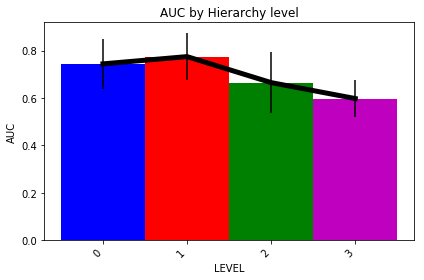

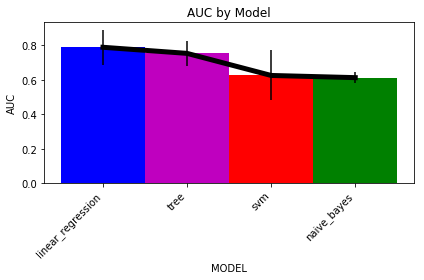

In [3]:
plot_bars_single_chunk(df = supervised_results, gb_param = "level",yaxis = "auc", base_filter = {}, 
                       lines_cases = {"level":[0,1,2,3]}, savefig=True, title="AUC by Hierarchy level", 
                       save_name="bar_auc_hier_level", width_delta=.1, language="english")

plot_bars_single_chunk(df = supervised_results, gb_param = "model",yaxis = "auc", base_filter = {}, 
                       lines_cases = {"model":list(supervised_results.model.unique())}, savefig=True, title="AUC by Model", 
                       save_name="bar_auc_hier_model", width_delta=.1, language="english")
